## Objektif Bisnis

Diabetes merupakan penyakit kronis dengan prevalensi yang terus meningkat dan sering kali tidak terdeteksi pada tahap awal. 
Proyek ini bertujuan untuk mendukung deteksi dini risiko diabetes dengan memanfaatkan model machine learning yang menganalisis data klinis dan demografis.

Dengan menyediakan indikasi awal tingkat risiko diabetes, sistem ini diharapkan dapat membantu tenaga kesehatan  dan individu dalam mengambil keputusan yang lebih cepat dan berbasis data untuk upaya pencegahan serta intervensi dini, sehingga berpotensi meningkatkan luaran kesehatan dan menekan biaya perawatan jangka panjang.


In [2]:
# Import Semua Library

import pandas as pd         # 'Pandas' adalah alat untuk mengolah data tabel (seperti Excel-nya Python).
import numpy as np          # 'Numpy' untuk operasi matematika canggih.
import pickle               # 'Pickle' untuk mengawetkan/menyimpan model (otak AI) ke dalam file.
import warnings             # Untuk mengatur pesan peringatan.

# Library dari Scikit-Learn (Sklearn) -> Ini adalah kotak peralatan utama Machine Learning.
from sklearn.model_selection import train_test_split, GridSearchCV # Alat untuk membagi data ujian & alat tuning otomatis.
from sklearn.preprocessing import StandardScaler, LabelEncoder     # Alat untuk mengubah data agar bisa dibaca komputer.
from sklearn.metrics import accuracy_score                         # Alat penilai (menghitung nilai ujian/akurasi).

# Import Algoritma (Otak yang akan kita latih)
from sklearn.neighbors import KNeighborsClassifier  # Algoritma berdasarkan kemiripan tetangga.
from sklearn.naive_bayes import GaussianNB          # Algoritma berdasarkan statistik/peluang.
from sklearn.tree import DecisionTreeClassifier     # Algoritma berbentuk pohon keputusan (If-Else).

In [6]:
# Data Loading
try:
    df = pd.read_csv('diabetes_dataset.csv')
    print(f"Data berhasil dibaca. Ukuran data: {df.shape} (Baris, Kolom)")
except FileNotFoundError:
    print("Error: File tidak ketemu. Pastikan nama filenya benar.")
    exit()

df.head()

Data berhasil dibaca. Ukuran data: (100000, 31) (Baris, Kolom)


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [7]:
# Menentukan Target: Apa yang ingin kita prediksi?
# Di sini kita ingin menebak kolom 'diagnosed_diabetes' (1=Sakit, 0=Sehat)
target = 'diagnosed_diabetes' 

# Menentukan Fitur: Data apa yang dipakai untuk menebak? (Umur, BMI, dll)
features = [
    'age', 'gender', 'bmi', 'glucose_fasting',
    'family_history_diabetes', 'hypertension_history', 'smoking_status',
    'physical_activity_minutes_per_week', 'cholesterol_total',
]

In [8]:
# Pre-Processing

# A. ENCODING (Menerjemahkan Bahasa Manusia ke Bahasa Komputer)
# Mengubah 'Male'/'Female' menjadi angka 0 atau 1.
le_gender = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender'])

le_smoking = LabelEncoder()
df['smoking_status'] = le_smoking.fit_transform(df['smoking_status'])

# B. MEMISAHKAN SOAL DAN KUNCI JAWABAN
X = df[features]  # Soal (Data Pasien)
y = df[target]    # Kunci Jawaban (Dia sakit atau tidak)

# C. Cek Missing value
df.isnull().sum()
print ("Missing Value per Kolom : ")
print (df.isnull().sum())

# D. SCALING (Menyamakan Satuan)
# Umur = 50, Gula Darah = 150. Angka 150 lebih besar dari 50, tapi bukan berarti lebih penting.
# Scaling membuat semua angka berada dalam rentang yang setara (misal -1 sampai 1).
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# E. TRAIN-TEST SPLIT (Membagi Data Belajar & Data Ujian)
# Kita tidak boleh menguji model dengan data yang sudah dia pelajari (itu namanya menyontek/menghafal).
# Jadi kita bagi: 80% untuk Belajar (Train), 20% untuk Ujian (Test).
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Missing Value per Kolom : 
age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasti

In [9]:
# Setiap algoritma punya "Settingan" (Hyperparameter).
# Contoh KNN: Berapa tetangga yang harus ditanya? 3? 5? atau 9?
# Kita tidak tahu mana yang terbaik, jadi kita siapkan daftarnya untuk dicoba semua.

model_params = {
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11],       # Coba jumlah tetangga yang berbeda
            'weights': ['uniform', 'distance']     # Coba cara hitung suara (semua setara atau yang dekat lebih didengar)
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': [1e-9, 1e-8, 1e-7]    # Coba variasi rumus matematika sedikit
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'criterion': ['gini', 'entropy'],      # Coba metode pemecahan cabang
            'max_depth': [None, 5, 10, 20],        # Coba batasi tinggi pohon (agar tidak terlalu menghafal)
            'min_samples_split': [2, 5, 10]        # Minimal data untuk membuat cabang baru
        }
    }
}

In [10]:
# Proses Looping Traning dan Testing
comparison_log = []
results_baseline = {} # Tempat simpan nilai sebelum di-tuning
results_tuned = {}    # Tempat simpan nilai setelah di-tuning
best_estimators = {}  # Tempat simpan "Otak" model terbaik

# Loop ini akan berjalan 3 kali (untuk KNN, Naive Bayes, dan Decision Tree)
for name, config in model_params.items():
    print(f"\nSedang melatih: {name}...")
    
    # --- LANGKAH A: Cek Performa Standar (Default) ---
    base_model = config['model']
    base_model.fit(X_train, y_train)           # Suruh model belajar
    y_pred_base = base_model.predict(X_test)   # Suruh model mengerjakan ujian
    acc_base = accuracy_score(y_test, y_pred_base) # Nilai ujiannya berapa?
    results_baseline[name] = acc_base
    print(f"   > Nilai Awal (Tanpa Setting): {acc_base:.2%}")
    
    # --- LANGKAH B: Tuning Otomatis (GridSearchCV) ---
    # GridSearchCV ibarat asisten yang mencoba SEMUA kombinasi settingan di atas.
    # cv=5 (Cross Validation) artinya dia memvalidasi ulang 5 kali biar hasilnya tidak kebetulan.
    grid = GridSearchCV(estimator=config['model'], param_grid=config['params'], cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    
    # Kita ambil settingan juara
    best_model = grid.best_estimator_
    y_pred_tuned = best_model.predict(X_test)
    acc_tuned = accuracy_score(y_test, y_pred_tuned)
    
    results_tuned[name] = acc_tuned
    best_estimators[name] = best_model

    comparison_log.append({
        'Model': name,
        'Akurasi Awal': acc_base,
        'Akurasi Tuned': acc_tuned,
        'Improvement': acc_tuned - acc_base
    })
    
    print(f"   > Nilai Setelah Tuning: {acc_tuned:.2%}")
    print(f"   > Settingan Terbaik: {grid.best_params_}")



Sedang melatih: K-Nearest Neighbors...
   > Nilai Awal (Tanpa Setting): 68.33%
   > Nilai Setelah Tuning: 69.92%
   > Settingan Terbaik: {'n_neighbors': 11, 'weights': 'uniform'}

Sedang melatih: Naive Bayes...
   > Nilai Awal (Tanpa Setting): 71.23%
   > Nilai Setelah Tuning: 71.23%
   > Settingan Terbaik: {'var_smoothing': 1e-09}

Sedang melatih: Decision Tree...
   > Nilai Awal (Tanpa Setting): 63.83%
   > Nilai Setelah Tuning: 72.84%
   > Settingan Terbaik: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


In [11]:
print(f"{'Nama Model':<20} | {'Nilai Awal':<12} | {'Nilai Akhir':<12} | {'Kenaikan':<10}")
print("-" * 65)

for name in model_params.keys():
    base = results_baseline[name]
    tuned = results_tuned[name]
    imp = tuned - base # Berapa kenaikannya?
    print(f"{name:<20} | {base:.2%}     | {tuned:.2%}     | {imp:+.2%}")

Nama Model           | Nilai Awal   | Nilai Akhir  | Kenaikan  
-----------------------------------------------------------------
K-Nearest Neighbors  | 68.33%     | 69.92%     | +1.59%
Naive Bayes          | 71.23%     | 71.23%     | +0.00%
Decision Tree        | 63.83%     | 72.84%     | +9.01%


In [22]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

for name, config in model_params.items():
    print("\n====================================")
    print(f"Sedang melatih: {name}")

    # =========================
    # BASELINE MODEL
    # =========================
    base_model = config['model']
    base_model.fit(X_train, y_train)
    y_pred_base = base_model.predict(X_test)

    print(f"\nClassification Report (Baseline) - {name}")
    print(classification_report(y_test, y_pred_base))

    # =========================
    # TUNED MODEL
    # =========================
    grid = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=5,
        n_jobs=-1,
        error_score="raise"   # supaya kalau model lain error, ketahuan
    )
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred_tuned = best_model.predict(X_test)

    print(f"\nClassification Report (Tuned) - {name}")
    print(classification_report(y_test, y_pred_tuned))



Sedang melatih: K-Nearest Neighbors

Classification Report (Baseline) - K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.61      0.59      0.60      8077
           1       0.73      0.75      0.74     11923

    accuracy                           0.68     20000
   macro avg       0.67      0.67      0.67     20000
weighted avg       0.68      0.68      0.68     20000


Classification Report (Tuned) - K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.64      0.59      0.61      8077
           1       0.74      0.77      0.75     11923

    accuracy                           0.70     20000
   macro avg       0.69      0.68      0.68     20000
weighted avg       0.70      0.70      0.70     20000


Sedang melatih: Naive Bayes

Classification Report (Baseline) - Naive Bayes
              precision    recall  f1-score   support

           0       0.63      0.69      0.66      8077
           1  


Evaluasi Confusion Matrix - K-Nearest Neighbors


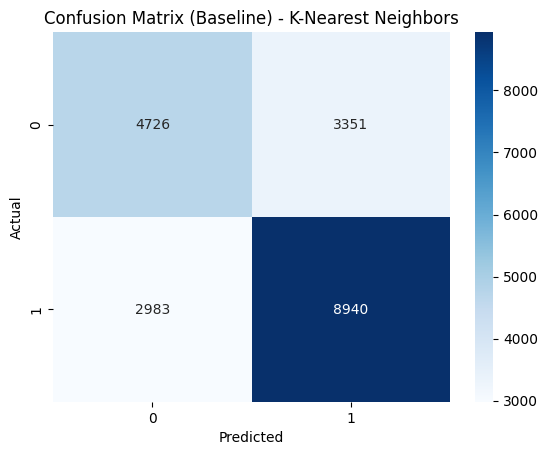

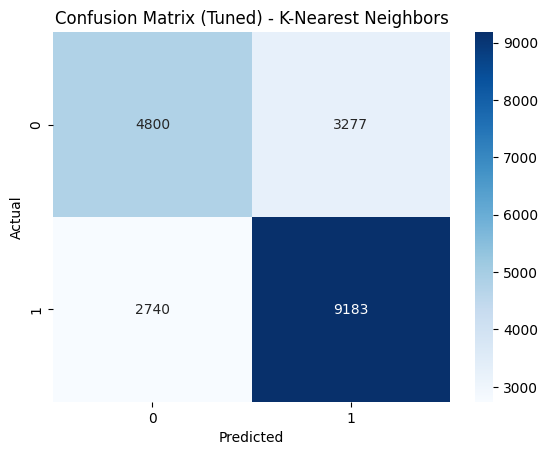


Evaluasi Confusion Matrix - Naive Bayes


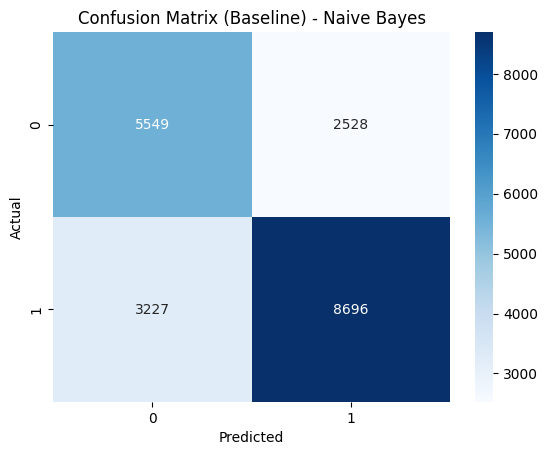

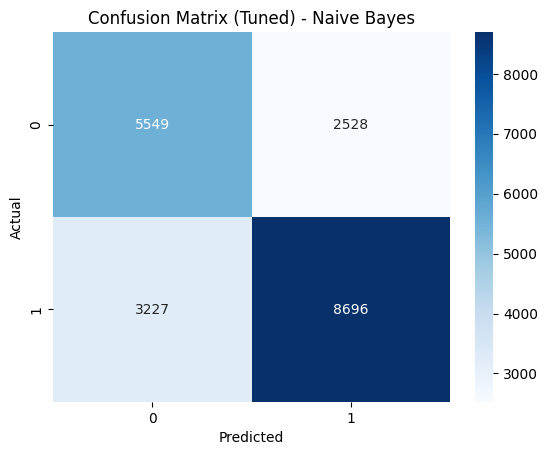


Evaluasi Confusion Matrix - Decision Tree


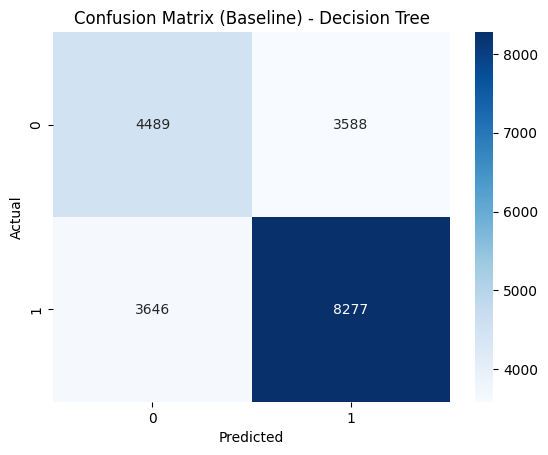

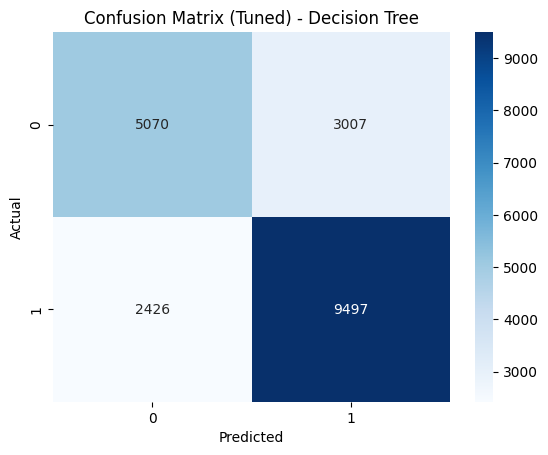

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

for name, config in model_params.items():
    print("\n====================================")
    print(f"Evaluasi Confusion Matrix - {name}")

    # ===============================
    # BASELINE MODEL
    # ===============================
    base_model = config['model']
    base_model.fit(X_train, y_train)
    y_pred_base = base_model.predict(X_test)

    cm_base = confusion_matrix(y_test, y_pred_base)
    sns.heatmap(cm_base, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix (Baseline) - {name}")
    plt.show()

    # ===============================
    # TUNED MODEL
    # ===============================
    grid = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=5,
        n_jobs=-1,
        error_score="raise"
    )
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred_tuned = best_model.predict(X_test)

    cm_tuned = confusion_matrix(y_test, y_pred_tuned)
    sns.heatmap(cm_tuned, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix (Tuned) - {name}")
    plt.show()


In [24]:
# Mencari siapa yang nilai akhirnya paling tinggi
best_name = max(results_tuned, key=results_tuned.get)
best_model_final = best_estimators[best_name]
best_acc = results_tuned[best_name]

print(f"🏆 JUARA UMUM ADALAH: {best_name}")
print(f"   Model ini akan disimpan untuk dipakai di Aplikasi Streamlit.")

🏆 JUARA UMUM ADALAH: Decision Tree
   Model ini akan disimpan untuk dipakai di Aplikasi Streamlit.


In [25]:
# Menyimpan model menjadi file pkl untuk digunakan di streamlit apps

artifact = {
    'model': best_model_final, 
    'scaler': scaler,
    'encoder_gender': le_gender,
    'encoder_smoking': le_smoking,
    'model_name': best_name,
    'accuracy': best_acc,
    'feature_names': features,
    'history': comparison_log
}

filename = 'diabetes_model.pkl'
with open(filename, 'wb') as f:
    pickle.dump(artifact, f)

print(f"✅ Berhasil! File tersimpan sebagai '{filename}'")

✅ Berhasil! File tersimpan sebagai 'diabetes_model.pkl'
